Student name: SM

Student pace: self

Scheduled project review date/time:

Instructor name: 

Blog post URL:

### Obtain

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Scrub

In [4]:
df = df.drop(columns="id") # drop 'id' column
df.head(0)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [5]:
df.info() # check datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


'date' may have to be converted to int64 somehow. Or made into another feature

floors needs conversion. why would there be non-integer floors?

sqft_basement needs conversion to float or integer

yr_renovated be made integer

#### Changing Datatypes

In [6]:
df.floors.describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [7]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

there seems to be a reason for # floors. will keep

In [8]:
df.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [9]:
true_objects = []
for val in df.sqft_basement.unique().tolist():
    try:
        float(val)
    except ValueError:
        true_objects.append(val)
print(true_objects)

['?']


removing the '?' entry, so that sqft_basement can be integer

In [10]:
df = df[df.sqft_basement != '?']

In [11]:
df['sqft_basement'] = df.sqft_basement.astype(float)

In [12]:
df.sqft_basement.dtype

dtype('float64')

In [13]:
mod_list = []
for n in df.sqft_basement:
    p = float(n) % 1
    if p > 0:
        mod_list.append(p)
    else:
        continue
print(mod_list)        

[]


refuses integer. because of decimals?

In [14]:
# df.sqft_basement.unique()

In [15]:
df['sqft_basement'] = df.sqft_basement.astype('O')

In [16]:
df.sqft_basement.head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement, dtype: object

In [17]:
df['sqft_basement'] = df.sqft_basement.astype('int64')

In [18]:
true_objects = []
for val in df.sqft_basement.unique().tolist():
    try:
        float(val)
    except ValueError:
        true_objects.append(val)
print(true_objects)

[]


In [19]:
df.sqft_basement.dtype

dtype('int64')

waterfront is mostly empty so drop it

In [20]:
df.waterfront[df.waterfront > 0].describe()

count    142.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: waterfront, dtype: float64

In [21]:
df.waterfront[df.waterfront == 0].shape[0]

18662

In [22]:
df.waterfront.shape[0]

21143

In [23]:
df.drop(['waterfront'], axis=1, inplace=True);

yr_renovated is similar to waterfront. but will be kept as an example of a boolean

In [24]:
df.yr_renovated[df.yr_renovated > 0].describe()

count     723.000000
mean     1996.053942
std        15.430251
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.500000
max      2015.000000
Name: yr_renovated, dtype: float64

In [25]:
df.yr_renovated[df.yr_renovated == 0].shape[0]

16666

In [26]:
df.yr_renovated.shape[0]

21143

date (sold) likely contains little information

In [27]:
df.drop(['date'], axis=1, inplace=True);

#### Convert Categorical data encoded as integers to String type

categoricals hiding as integers

In [28]:
df.select_dtypes(include='int64').head()

,bedrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,3,1180,5650,3,7,1180,0,1955,98178,1340,5650
1,3,2570,7242,3,7,2170,400,1951,98125,1690,7639
2,2,770,10000,3,6,770,0,1933,98028,2720,8062
3,4,1960,5000,5,7,1050,910,1965,98136,1360,5000
4,3,1680,8080,3,8,1680,0,1987,98074,1800,7503


are categorical vars: yr_built, zipcode

bedroom, condition, grade, are probably discrete numerical

yr_built could be converted to 'age', a numerical var

the rest are true integers

In [29]:
df['zipcode'] = df.zipcode.astype(object)

categoricals hiding as floats

In [30]:
df.select_dtypes(include='float64').head(0)

,price,bathrooms,floors,view,yr_renovated,lat,long


In [31]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [32]:
df.view.dtype

dtype('float64')

view can be made integer later

#### Handle nulls

In [33]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [34]:
df.dropna(subset=['view'], inplace=True);

In [35]:
df.view.isna().sum()

0

In [36]:
df.yr_renovated.isna().sum()

3742

In [37]:
df.yr_renovated.describe()

count    17340.000000
mean        83.111419
std        398.756281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [38]:
df.dropna(subset=['yr_renovated'], inplace=True);

In [39]:
df.yr_renovated.isna().sum()

0

In [40]:
df['view'] = df.view.astype('int64')

In [41]:
df.view.dtype

dtype('int64')

In [42]:
df.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

#### _(minor)_ Feature engineering

converting 'yr_built' to 'age'

In [43]:
df.yr_built.head()

0    1955
1    1951
3    1965
4    1987
5    2001
Name: yr_built, dtype: int64

In [44]:
age_list = []
for year in df['yr_built']:
    n = 2019-year
    age_list.append(n)

In [45]:
df['age'] = age_list

In [46]:
df.age.head()

0    64
1    68
3    54
4    32
5    18
Name: age, dtype: int64

In [47]:
df.drop(['yr_built'], axis=1, inplace=True);

converting yr_renovated to a boolean

In [48]:
df.yr_renovated.head()

0       0.0
1    1991.0
3       0.0
4       0.0
5       0.0
Name: yr_renovated, dtype: float64

In [49]:
df.yr_renovated[df.yr_renovated > 0].describe()

count     722.000000
mean     1996.055402
std        15.440898
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.750000
max      2015.000000
Name: yr_renovated, dtype: float64

In [50]:
df.yr_renovated[df.yr_renovated > 0].value_counts().sum()

722

there are only 722 years - not a lot of information. "Renovated or Not" is more useful information

In [51]:
yr_list = []
for year in df.yr_renovated:
    if year > 0:
        yr_list.append(1)
    else:
        yr_list.append(0)

In [52]:
df['renovated'] = yr_list

In [53]:
df['renovated'].head()

0    0
1    1
3    0
4    0
5    0
Name: renovated, dtype: int64

In [54]:
df.drop(['yr_renovated'], axis=1, inplace=True);

#### Multicollinearity

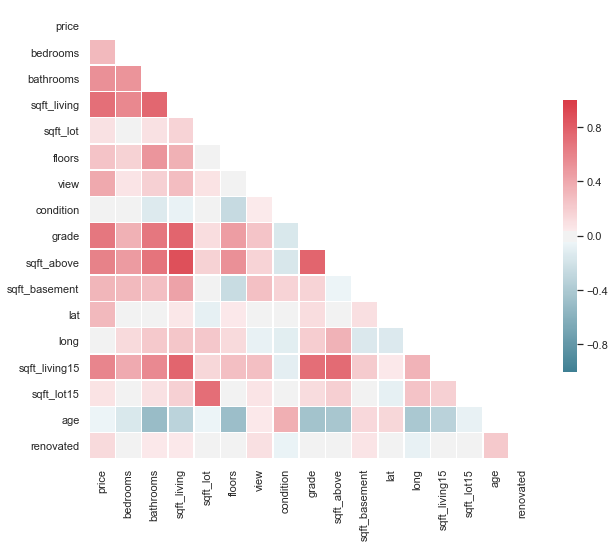

In [55]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

##### Highest Correlations with Target

In [56]:
# abs(df.corr().price) > .5

best predictors of price @ r>.5 : bathrooms, sqft_living, grade, sqft_above, sqft_living15; (r>.7 is too high a threshold for finding price predictors)

##### Feature selection (removal)

In [57]:
# (abs(df.corr()) > .7)
# (abs(df.corr()) > .7).iloc[0:4]
# (abs(df.corr()) > .7).iloc[5:10]
# (abs(df.corr()) > .7).iloc[11:16]

considerably correlated features:

price vs sqft_living, bathrooms vs sqft_living, sqft_living vs grade, sqft_living vs sqft_above, sqft_living vs sqft_living15

grade vs sqft_above, grade vs sqft_living15, sqft_above vs grade, sqft_above vs sqft_living15

sqft_lot15 vs sqft_lot

best candidates for removal (occurances of multicollinearity):
    
sqft_living (5)

grade (4)

sqft_living15 (3)

sqft_lot15 (1)

In [58]:
df.drop(['sqft_living','grade','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [59]:
df.head(0)

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,zipcode,lat,long,age,renovated


#### Feature Scaling
is unnecessary for Multiple Linear Regression models. But here is an example

In [60]:
# df.hist(figsize=(10,10));

sqft_above, sqft_basement, & sqft_lot are notably skwed

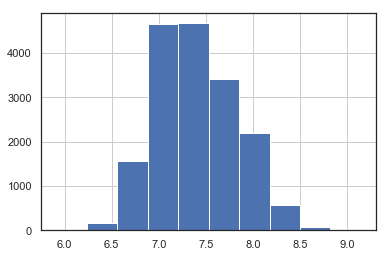

In [61]:
np.log(df.sqft_above).hist();

In [62]:
df['log_sqft_above'] = np.log(df.sqft_above);

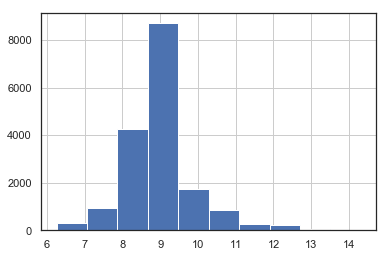

In [63]:
np.log(df.sqft_lot).hist();

In [64]:
df['log_sqft_lot'] = np.log(df.sqft_lot);

C:\Users\msedi\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


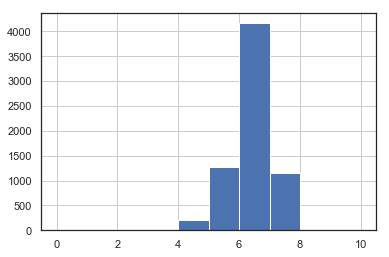

In [65]:
np.log(df.sqft_basement).hist(range=(0,10));

In [66]:
df['log_sqft_basement'] = np.log(df.sqft_basement);

C:\Users\msedi\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [67]:
print(df.log_sqft_basement.min(), df.log_sqft_basement.max())

-inf 8.480529207044645


In [68]:
inf_clean = []
for n in df.log_sqft_basement:
    if n == float('-inf'):
        inf_clean.append(0)
    else:
        inf_clean.append(n)

In [69]:
# inf_clean[0:14]

In [70]:
# df['log_sqft_basement'].head(13)

In [71]:
df['log_sqft_basement'] = inf_clean

In [72]:
print(df.log_sqft_basement.min(), df.log_sqft_basement.max())

0.0 8.480529207044645


These 3 features have been Log-scaled:

In [73]:
sqft_lot_series = df['sqft_lot']

In [74]:
df.drop(['sqft_above','sqft_lot', 'sqft_basement'], axis=1, inplace=True)

They are now smaller (in range and magnitude), more normal, and more readable!

Could log scale the target:

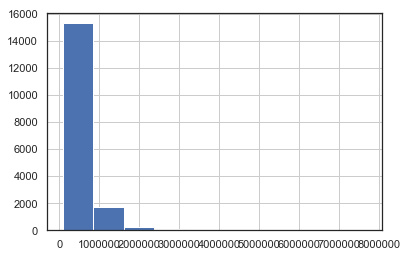

In [75]:
df['price'].hist();

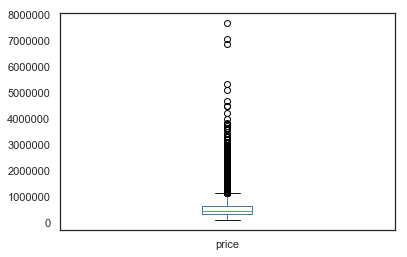

In [76]:
df['price'].plot.box()

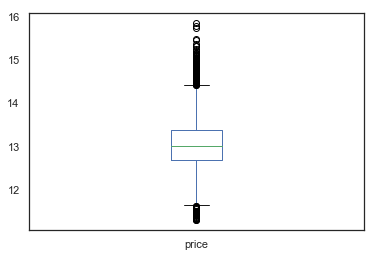

In [77]:
np.log((df['price'])).plot.box();

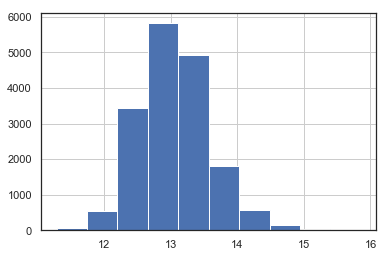

In [78]:
np.log((df['price'])).hist();

In [79]:
# convert price to log(price)
df['price'] = np.log((df['price']))

Note: but I won't rename 'price' to 'log_price' for sake of efficiency

#### Categoricals / One-hot encoding

In [80]:
df.select_dtypes(include='object').head()

,zipcode
0,98178
1,98125
3,98136
4,98074
5,98053


zipcode is the only remaining categorical var.

It can be one-hot encoded

In [81]:
zc = df['zipcode']

In [82]:
zc = pd.get_dummies(df['zipcode'])

In [83]:
zc.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# drop zipcode column from df
df.drop(['zipcode'], axis=1, inplace=True);

In [85]:
## to join zipcode dummies to original dataframe
# df = df.join(zc);

In [86]:
# df.head()

### Explore

In [87]:
# df.describe()

In [88]:
# df.hist(figsize=(10,10));

'view' and 'log_sqft_basement' are full of 0's. They _could_ be made into booleans

In [89]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17340 entries, 0 to 21596
Data columns (total 13 columns):
price                17340 non-null float64
bedrooms             17340 non-null int64
bathrooms            17340 non-null float64
floors               17340 non-null float64
view                 17340 non-null int64
condition            17340 non-null int64
lat                  17340 non-null float64
long                 17340 non-null float64
age                  17340 non-null int64
renovated            17340 non-null int64
log_sqft_above       17340 non-null float64
log_sqft_lot         17340 non-null float64
log_sqft_basement    17340 non-null float64
dtypes: float64(8), int64(5)
memory usage: 1.9 MB


#### Outliers

In [90]:
def box_stats(col):
    Q_1 = col.quantile(.25)
    Q_3 = col.quantile(.75)
    IQR = Q_3 - Q_1
    box_min = Q_1-1.5*IQR
    box_max = Q_3+1.5*IQR
    print(box_min, box_max)

##### Outliers in predictors

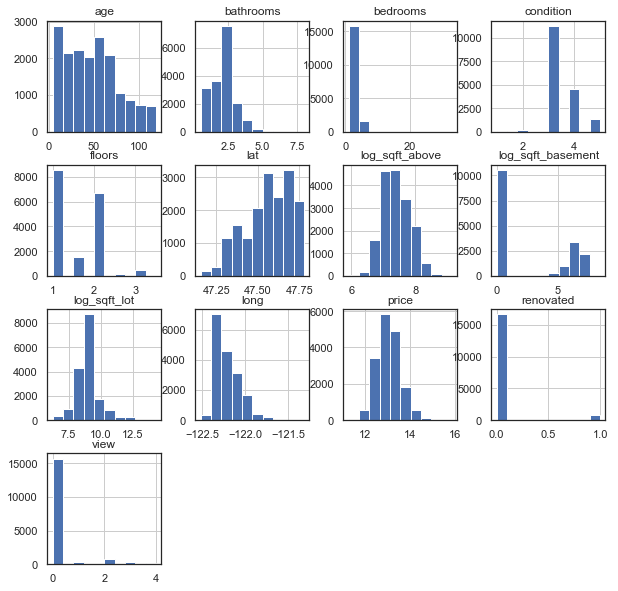

In [91]:
df.hist(figsize=(10,10));

bathrooms, bedrooms, and lat could use work. Also, log_sqft_basement and age could use some work

outliers of bathroom

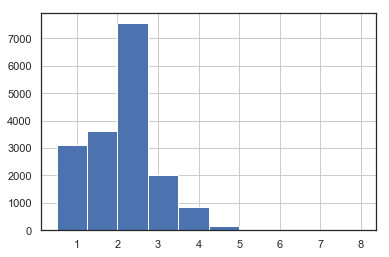

In [92]:
df['bathrooms'].hist();

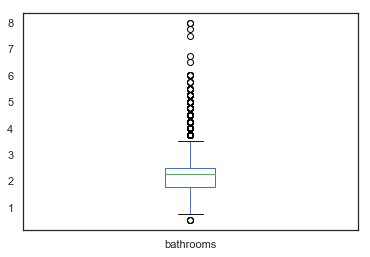

In [93]:
df['bathrooms'].plot.box();
# df.boxplot(column='bathrooms'); # synonym

In [94]:
def box_stats(col):
    Q_1 = col.quantile(.25)
    Q_3 = col.quantile(.75)
    IQR = Q_3 - Q_1
    box_min = Q_1-1.5*IQR
    box_max = Q_3+1.5*IQR
    print(box_min, box_max)

In [95]:
box_stats(df.bathrooms)

0.625 3.625


In [96]:
(df[df['bathrooms'] > 4]).shape

(214, 13)

In [97]:
(df[df['bathrooms'] <= 4]).shape

(17126, 13)

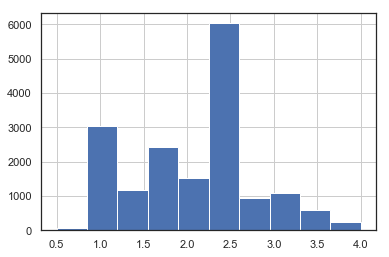

In [98]:
(df['bathrooms'][df['bathrooms'] <= 4]).hist();

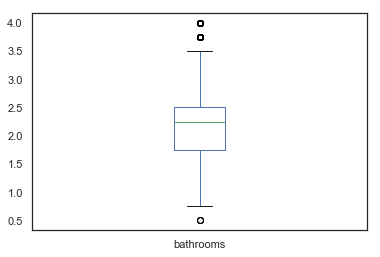

In [99]:
(df['bathrooms'][df['bathrooms'] <= 4]).plot.box();

In [100]:
## tossing 200 outliers
df = df[df['bathrooms'] <= 4]

outliers of bedrooms

In [101]:
df.bedrooms.unique()

array([ 3,  4,  2,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

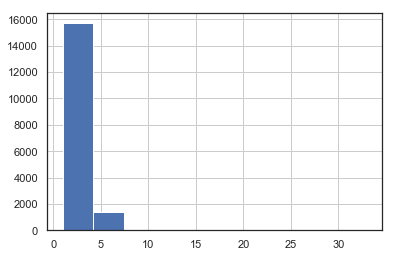

In [102]:
df.bedrooms.hist();

In [103]:
box_stats(df.bedrooms)

1.5 5.5


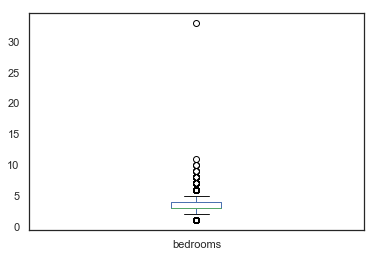

In [104]:
df['bedrooms'].plot.box();

In [105]:
(df[df['bedrooms'] > 6]).shape

(33, 13)

In [106]:
(df[df['bedrooms'] <= 6]).shape

(17093, 13)

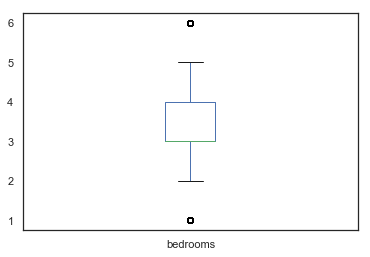

In [107]:
(df['bedrooms'][df['bedrooms'] <= 6]).plot.box();

In [108]:
## tossing 50 outliers
df = df[df['bedrooms'] <= 6]

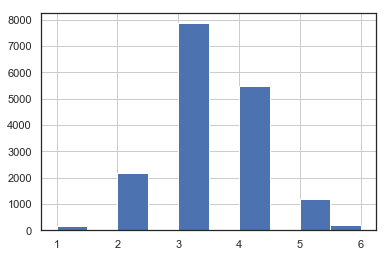

In [109]:
df.bedrooms.hist();

outliers of log_sqft_basement

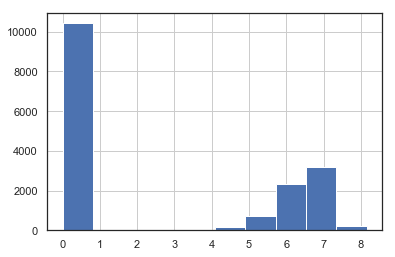

In [110]:
df.log_sqft_basement.hist();

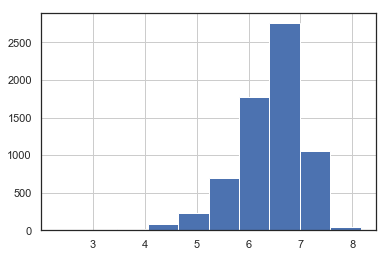

In [111]:
(df['log_sqft_basement'][df['log_sqft_basement'] > 0]).hist();

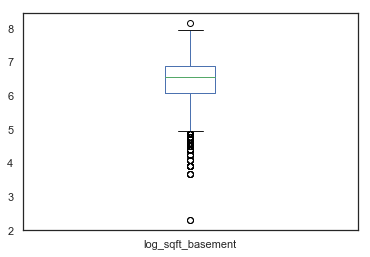

In [112]:
(df['log_sqft_basement'][df['log_sqft_basement'] > 0]).plot.box();

In [113]:
(df[df['log_sqft_basement'] > 0]).shape

(6662, 13)

In [114]:
(df[df['log_sqft_basement'] == 0]).shape

(10431, 13)

In [115]:
df.shape

(17093, 13)

it's mostly zeroes, and has already been transformed. it may end up dropped from the model

transformation of age

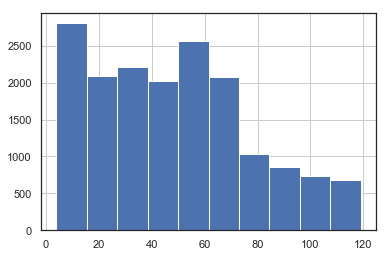

In [116]:
df.age.hist();

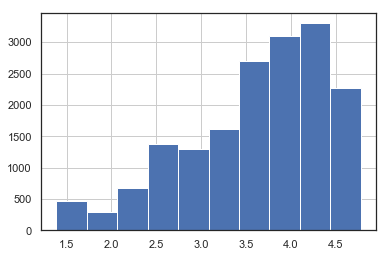

In [117]:
np.log(df.age).hist();

In [118]:
df['log_age'] = np.log(df.age)

In [119]:
df.drop(['age'], axis=1, inplace=True)

while skewed, age is now more normal

In [120]:
df.head(0)

,price,bedrooms,bathrooms,floors,view,condition,lat,long,renovated,log_sqft_above,log_sqft_lot,log_sqft_basement,log_age


#### Outliers in the target

we could focus on homes rather than mansions

either this (cull outliers in 'price') or take the log of price. Either accomplish normality

In [121]:
# df['price'].describe()

In [122]:
# df.price.max() - df.price.min()# spread

In [123]:
# box_stats(df.price)

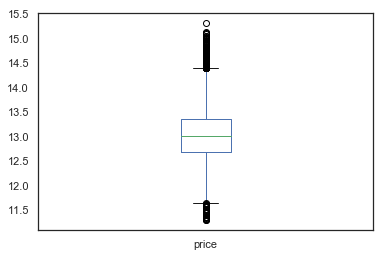

In [124]:
df['price'].plot.box();

In [125]:
df.price[df['price'] > 650000].count()

0

In [126]:
df.price[df['price'] < 650000].count()

17093

In [127]:
## code to toss 4000 outliers, but that's a bit much
# df = df[df['price'] < 650000] 

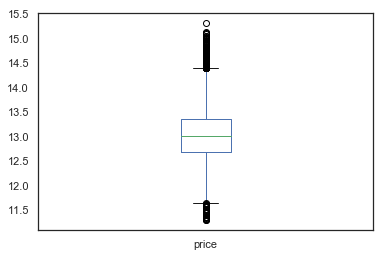

In [128]:
df.price[df['price'] < 650000].plot.box();

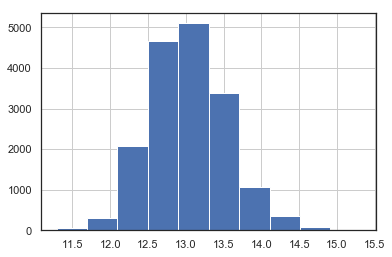

In [129]:
df.price[df['price'] < 650000].hist();

price is fairly normal when outliers eliminated

In [130]:
## tossing 4000 outliers to make 'price' normal
# df = df[df['price'] < 650000]

#### Other exploration: seaborn plots

In [131]:
# x_vars_list = list(df.columns); x_vars.pop(0); print(x_vars_list)

In [132]:
## Warning! takes several seconds
# sns.pairplot(data=df, x_vars=x_vars_list, y_vars=['price']);

In [133]:
# sns.jointplot(x=df.sqft_basement, y=df.price);

In [134]:
# sns.kdeplot(data=df.price, y=df.log_sqft_basement)

### Model

define Outcomes v Columns

In [135]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'lat',
       'long', 'renovated', 'log_sqft_above', 'log_sqft_lot',
       'log_sqft_basement', 'log_age'],
      dtype='object')

In [136]:
outcome = 'price'

In [137]:
x_cols = list(df.columns); x_cols.pop(0); print(x_cols)

['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'lat', 'long', 'renovated', 'log_sqft_above', 'log_sqft_lot', 'log_sqft_basement', 'log_age']


#### OLS / p analysis

In [138]:
# import statsmodels.formula.api import smf # may need this
from statsmodels.formula.api import ols

In [139]:
# fitting the model #OLS
predictors = "+".join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()

In [140]:
model.summary() # results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     3099.
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:18:23   Log-Likelihood:                -2831.7
No. Observations:               17093   AIC:                             5689.
Df Residuals:                   17080   BIC:                             5790.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -81.1494      2.453    -33.082      0.000     -85.958     -76.341
bedrooms             -0.0481      0.003    -14.661      0.000      -0.054      -0.042
bathrooms             0.0705      0.005     12.878      0.000       0.060       0.081
floors                0.0310      0.006      4.877      0.000       0.019       0.044
view                  0.1181      0.003     37.688      0.000       0.112       0.124
condition             0.0787      0.004     21.161      0.000       0.071       0.086
lat                   1.5578      0.016     94.604      0.000       1.525       1.590
long                 -0.1147      0.019     -6.025      0.000      -0.152      -0.077
renovated             0.1301      0.012     11.159      0.000       0.107       0.153
log_sqft_above        0.7503      0.010     74.497      0.000       0.731       0.770
log_sqft_lot         -0.0023      0.003     -0.701      0.483      -0.009       0.004
log_sqft_basement     0.0386      0.001     42.045      0.000       0.037       0.040
log_age               0.0360      0.005      7.980      0.000       0.027       0.045
==============================================================================
Omnibus:                      209.835   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.430
Skew:                           0.143   Prob(JB):                     1.75e-67
Kurtosis:                       3.592   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### p analysis
p(long) =  .16 -> should remove

p(log_sqft_lot) = .518 -> that's super high, its log should be undone and reworked, or it should be removed


In [141]:
df.drop(['log_sqft_lot'], axis=1, inplace=True)

#### OLS / r^2 analysis

In [142]:
x_cols = list(df.columns); x_cols.pop(0); print(x_cols)

['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'lat', 'long', 'renovated', 'log_sqft_above', 'log_sqft_basement', 'log_age']


In [143]:
# Ordinary Least Squares
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [144]:
# Runs OLS regression between (continuous) independent and dependent variables
col_names = x_cols
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
#     print ("")
#     print ("King County Houses: Price~" + val)
#     print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results[idx+1])

In [145]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.109192,12.3818,0.194877,0
2,bathrooms,0.266343,12.2629,0.369615,0
3,floors,0.0882629,12.6149,0.28174,0
4,view,0.104168,12.9855,0.22207,0
5,condition,0.0014919,12.9316,0.0301018,4.38631e-07
6,lat,0.21102,-66.9427,1.68164,0
7,long,0.00267114,35.8615,0.186781,1.36964e-11
8,renovated,0.0132771,13.0222,0.296562,1.31022e-51
9,log_sqft_above,0.319409,7.9262,0.691601,0


#### r^2 analysis
condition, long, renovated, log_age, and log_sqft_lot have the lowest r^2 (i.e. r^2 < .02). ('zipcode' too if included)
They should be removed based on that.

In [146]:
df.drop(['condition', 'long', 'renovated', 'log_age'], axis=1, inplace=True)

In [147]:
df.head(0)

,price,bedrooms,bathrooms,floors,view,lat,log_sqft_above,log_sqft_basement


#### Checks of Intra-multicollinearity

Another test for multicollinearity is the variance inflation factor. Typically, variables with a vif of 5 or greater (or more definitively 10 or greater) are displaying multicollinearity with other variables in the feature set.

In [148]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
# x_cols = list(df.columns); x_cols.pop(0); print(x_cols)

In [150]:
# X = df[x_cols]

In [151]:
# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# list(zip(x_cols, vif))

#### Assumptions Necessary for Linear Regression

##### 1) Linearity 
(Checking X vs Y linearity via Scatterplots)

In [152]:
x_cols = list(df.columns); x_cols.pop(0); print(x_cols)

['bedrooms', 'bathrooms', 'floors', 'view', 'lat', 'log_sqft_above', 'log_sqft_basement']


In [153]:
sns.set()

In [154]:
# sns.scatterplot(x='bedrooms', y="price", data=df);

In [155]:
# sns.scatterplot(x='bathrooms', y="price", data=df);

In [156]:
# sns.scatterplot(x='floors', y="price", data=df);

In [157]:
# sns.scatterplot(x='view', y="price", data=df);

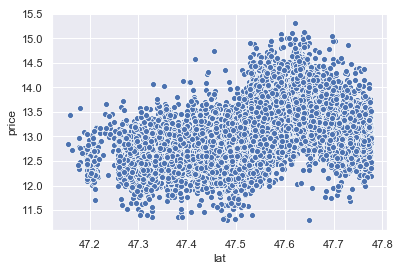

In [158]:
sns.scatterplot(x='lat', y="price", data=df);

price v latitude isn't quite linear

In [159]:
df.drop(['lat'], axis=1, inplace=True)

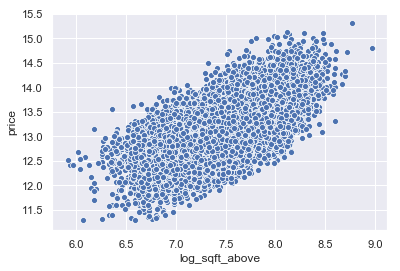

In [160]:
sns.scatterplot(x='log_sqft_above', y="price", data=df);

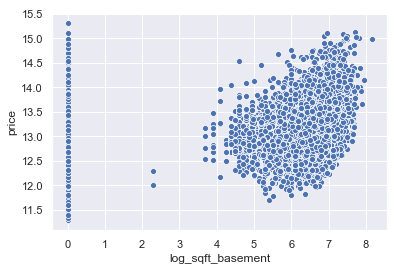

In [161]:
sns.scatterplot(x='log_sqft_basement', y="price", data=df);

apart from its 0's, log_sqft_basement looks fairly linear against the target

##### 2) Check for Normality of Predictors / Q-Q

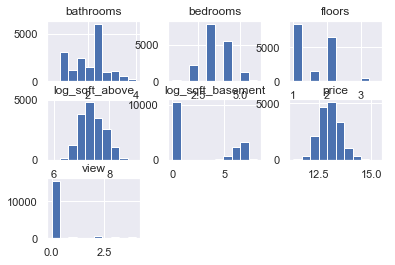

In [162]:
df.hist();

most features are fairly normal at this point

C:\Users\msedi\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


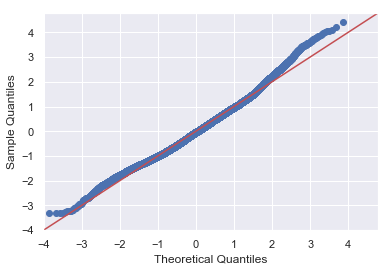

In [163]:
# import statsmodels.api as sm
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

if 'log_price' is the target, the QQ plot appears very linear

if 'price' is the target, the QQ plot is only non-normal at the extremes

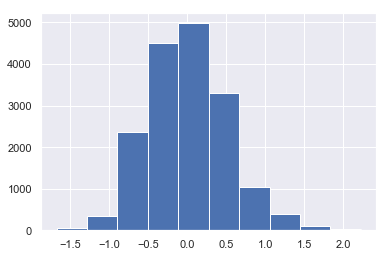

In [164]:
model.resid.hist();

##### 3) Homoscedasticity

model actually has to be rerun due to dropped columns, before homoscedasticity can be checked...

### (Second OLS)

In [165]:
x_cols = list(df.columns); x_cols.pop(0); print(x_cols)

['bedrooms', 'bathrooms', 'floors', 'view', 'log_sqft_above', 'log_sqft_basement']


In [166]:
# Runs OLS regression between (continuous) independent and dependent variables
col_names = x_cols
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
#     print ("")
#     print ("King County Houses: Price~" + val)
#     print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results[idx+1])

In [167]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.109192,12.3818,0.194877,0
2,bathrooms,0.266343,12.2629,0.369615,0
3,floors,0.0882629,12.6149,0.28174,0
4,view,0.104168,12.9855,0.22207,0
5,log_sqft_above,0.319409,7.9262,0.691601,0
6,log_sqft_basement,0.049557,12.9445,0.0358669,6.38118e-191


In [168]:
# fitting the model #OLS
predictors = "+".join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2667.
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:18:26   Log-Likelihood:                -7062.5
No. Observations:               17093   AIC:                         1.414e+04
Df Residuals:                   17086   BIC:                         1.419e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.3811      0.073    101.285      0.000       7.238       7.524
bedrooms             -0.0526      0.004    -12.683      0.000      -0.061      -0.044
bathrooms             0.0190      0.006      2.931      0.003       0.006       0.032
floors                0.0586      0.007      8.531      0.000       0.045       0.072
view                  0.1209      0.004     30.700      0.000       0.113       0.129
log_sqft_above        0.7492      0.012     65.048      0.000       0.727       0.772
log_sqft_basement     0.0567      0.001     49.607      0.000       0.054       0.059
==============================================================================
Omnibus:                       62.580   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.666
Skew:                           0.075   Prob(JB):                     3.66e-12
Kurtosis:                       2.773   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

homoscedasticity scatter:

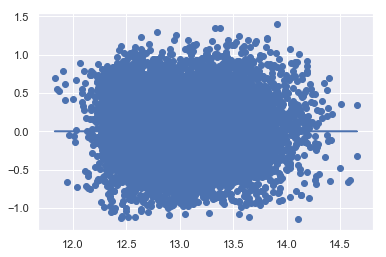

In [169]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))]);

### Model Validation via Train-Test Split

initial split

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
x_cols = list(df.columns); x_cols.pop(0); print(x_cols)

['bedrooms', 'bathrooms', 'floors', 'view', 'log_sqft_above', 'log_sqft_basement']


In [191]:
X = df[x_cols]

In [192]:
y = df[['price']]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [194]:
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

12819 4274 12819 4274


Application to the train set

In [195]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [196]:
# Fitting the model to the train data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
# Calculating predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [198]:
# Calculating the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [199]:
# Calculating MSE
from sklearn.metrics import mean_squared_error

In [200]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.1332850783937821
Test Mean Squarred Error: 0.13533585265452108


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases. This isn't the case above, so the model is valid.